**Data Loading**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = r"/content/drive/MyDrive/monty_project /train_E6oV3lV.csv"  #path to data file (just change this path to load data)

In [3]:
pip install pandas-profiling

In [4]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
#import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import pandas as pd
data_frame = pd.read_csv(data_path)    #loading the data set into dataframe 

In [6]:
def print_data_information():
  print("Dimention of the data set:",data_frame.shape)
  print("Tweets with NA value:",data_frame['tweet'].isna().sum())
  print("Labels with NA values:",data_frame['label'].isna().sum())
  print("Printing top 10 values of the data set")
  print("*****************************************")
  print(data_frame.head())

print_data_information()

Dimention of the data set: (31962, 3)
Tweets with NA value: 0
Labels with NA values: 0
Printing top 10 values of the data set
*****************************************
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


**Data Preprocessing**

In [7]:
pip install unidecode

In [8]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
lemmatizer = WordNetLemmatizer()

def preprocess_data_frame():
  data_frame['clean_tweet'] = data_frame['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")])) #Remove @
  data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*'])) #Remove numbers
  #data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))   #Remove greek symbols
  data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ])) #Remove hm*
  data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split())) #Replace slang words
  data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))  #Lemmatization 

preprocess_data_frame()

**Data visualisation**

In [9]:
data_frame

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwave trying to wr...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad song on a monday morning otw ...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."


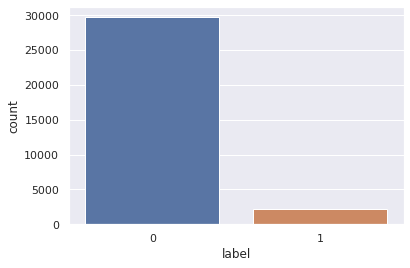

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(data_frame['label'], order = data_frame['label'].value_counts().index)

In [11]:
#Tokenization
corpus = []
#ps = PorterStemmer()
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    #tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [12]:
len(corpus)

31962

In [13]:
pip install wordcloud

Normal words


(-0.5, 799.5, 499.5, -0.5)

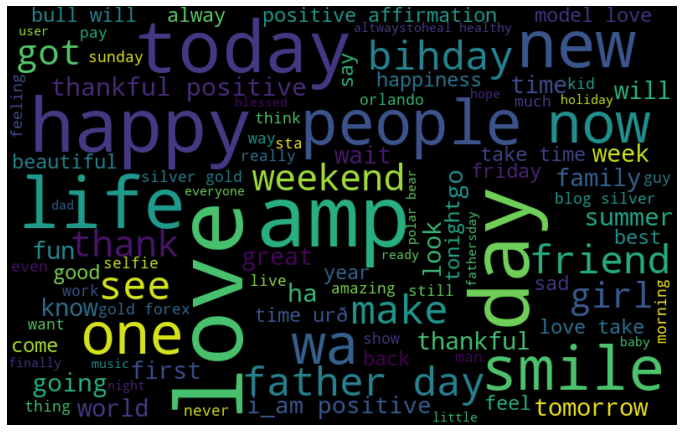

In [14]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

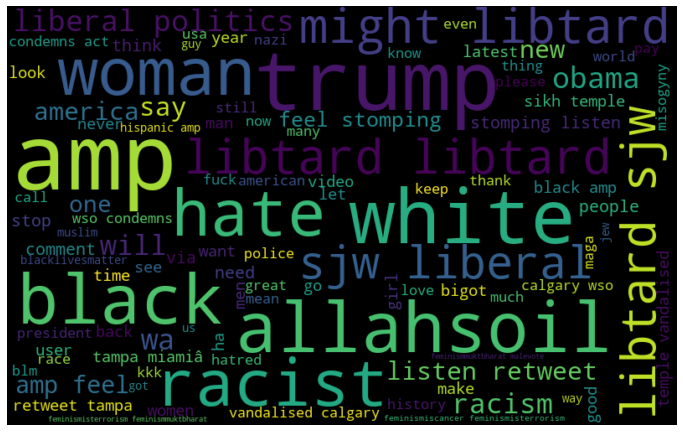

In [15]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

**Dividing data**

In [16]:
#Techniques to convert the tweets into Bag-of-Words, TF-IDF, and Word Embeddings
#Building various classifiers: -
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 500,max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = data_frame.loc[:,'label'].values

**Applying Models and checking the Accuracy**

In [17]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, data_frame['label'], test_size = 0.2)

In [21]:
#Random Forest 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0    1
Actual              
0          5858   72
1           252  211
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5930
           1       0.75      0.46      0.57       463

    accuracy                           0.95      6393
   macro avg       0.85      0.72      0.77      6393
weighted avg       0.94      0.95      0.94      6393



In [25]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB
nav_clf = GaussianNB()
nav_clf.fit(X1_train, Y1_train)
predict_nav = nav_clf.predict(X1_test)

print(pd.crosstab(Y1_test,predict_nav,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, predict_nav))

Predicted     0     1
Actual               
0          2884  3046
1            16   447
              precision    recall  f1-score   support

           0       0.99      0.49      0.65      5930
           1       0.13      0.97      0.23       463

    accuracy                           0.52      6393
   macro avg       0.56      0.73      0.44      6393
weighted avg       0.93      0.52      0.62      6393



In [27]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_reg.fit(X1_train,Y1_train)
predict_log = log_reg.predict(X1_test)

print(pd.crosstab(Y1_test,predict_log,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, predict_log))

Predicted     0    1
Actual              
0          5898   32
1           314  149
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5930
           1       0.82      0.32      0.46       463

    accuracy                           0.95      6393
   macro avg       0.89      0.66      0.72      6393
weighted avg       0.94      0.95      0.93      6393



In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X1_train,Y1_train)
predict_tree = clf.predict(X1_test)

print(pd.crosstab(Y1_test,predict_tree,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, predict_tree))

Predicted     0    1
Actual              
0          5785  145
1           259  204
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5930
           1       0.58      0.44      0.50       463

    accuracy                           0.94      6393
   macro avg       0.77      0.71      0.73      6393
weighted avg       0.93      0.94      0.93      6393

